In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [286]:
# Load the CSV file into a DataFrame
file_path = '/Users/karina/PycharmProjects/2pSnakeAi/game_data.csv'
data = pd.read_csv(file_path)

data.head(), data.columns


(      Startthegame Algorithm  Time took eat apple  Turns  Snake start x  \
 0  240426124904216     astar                550.0     16             25   
 1  240426124904216       bfs                550.0     16             25   
 2  240426124904216     astar                614.0     42             30   
 3  240426124904216       bfs                614.0     42             30   
 4  240426124904216     astar                312.0     30             18   
 
    Snake start y  Apple x  Apple y  
 0             25       30       36  
 1             25       30       36  
 2             36       18        6  
 3             36       18        6  
 4              6       22       32  ,
 Index(['Startthegame', 'Algorithm', 'Time took eat apple', 'Turns',
        'Snake start x', 'Snake start y', 'Apple x', 'Apple y'],
       dtype='object'))

In [287]:
# Drop rows with missing values
data = data.dropna()

#'Startthegame' column values are unique identifiers for each game session
game_sessions = {}

# Group the DataFrame by 'Startthegame'
grouped = data.groupby('Startthegame')

# separate DataFrame for each unique game session and store it in the dictionary
for name, group in grouped:
    game_sessions[name] = group

# Access and print the DataFrame for the first game session (if the dictionary is not empty)
if game_sessions:
    first_key = next(iter(game_sessions))  # Get the first key from the dictionary
    print("Data for the first game session based on 'Startthegame':")
    print(game_sessions[first_key])
else:
    print("No game sessions found.")


Data for the first game session based on 'Startthegame':
        Startthegame Algorithm  Time took eat apple  Turns  Snake start x  \
0    240426124904216     astar                550.0     16             25   
1    240426124904216       bfs                550.0     16             25   
2    240426124904216     astar                614.0     42             30   
3    240426124904216       bfs                614.0     42             30   
4    240426124904216     astar                312.0     30             18   
..               ...       ...                  ...    ...            ...   
298  240426124904216       bfs               1836.0     45              1   
299  240426124904216       bfs               1806.0     31             16   
300  240426124904216       bfs               1114.0     14             37   
301  240426124904216       bfs               1418.0     28             40   
302  240426124904216       bfs               1087.0     13             19   

     Snake start y

In [288]:
# 'game_sessions' is the dictionary containing the game data

# List to store session keys
session_keys = list(game_sessions.keys())
# Define the number of sessions to analyze
number_of_sessions_to_analyze = 25  

# Iterate over the game sessions up to the specified number
for index, (key, session) in enumerate(game_sessions.items()):
    if index >= number_of_sessions_to_analyze:
        break  # Stop after analyzing the specified number of sessions
    
    print(f"\n--- Game Session {index + 1} (Key: {key}) ---")
    print("First rows of the game session:")
    print(session.head()) 
    
    # Calculate the count of apples eaten (score) by each algorithm in this session
    count_of_algorithms = session['Algorithm'].value_counts()
    
    print("\nScore of Algorithms:")
    print(count_of_algorithms)



--- Game Session 1 (Key: 240426124904216) ---
First rows of the game session:
      Startthegame Algorithm  Time took eat apple  Turns  Snake start x  \
0  240426124904216     astar                550.0     16             25   
1  240426124904216       bfs                550.0     16             25   
2  240426124904216     astar                614.0     42             30   
3  240426124904216       bfs                614.0     42             30   
4  240426124904216     astar                312.0     30             18   

   Snake start y  Apple x  Apple y  
0             25       30       36  
1             25       30       36  
2             36       18        6  
3             36       18        6  
4              6       22       32  

Score of Algorithms:
bfs      164
astar    139
Name: Algorithm, dtype: int64

--- Game Session 2 (Key: 240426125609464) ---
First rows of the game session:
        Startthegame Algorithm  Time took eat apple  Turns  Snake start x  \
303  240426125

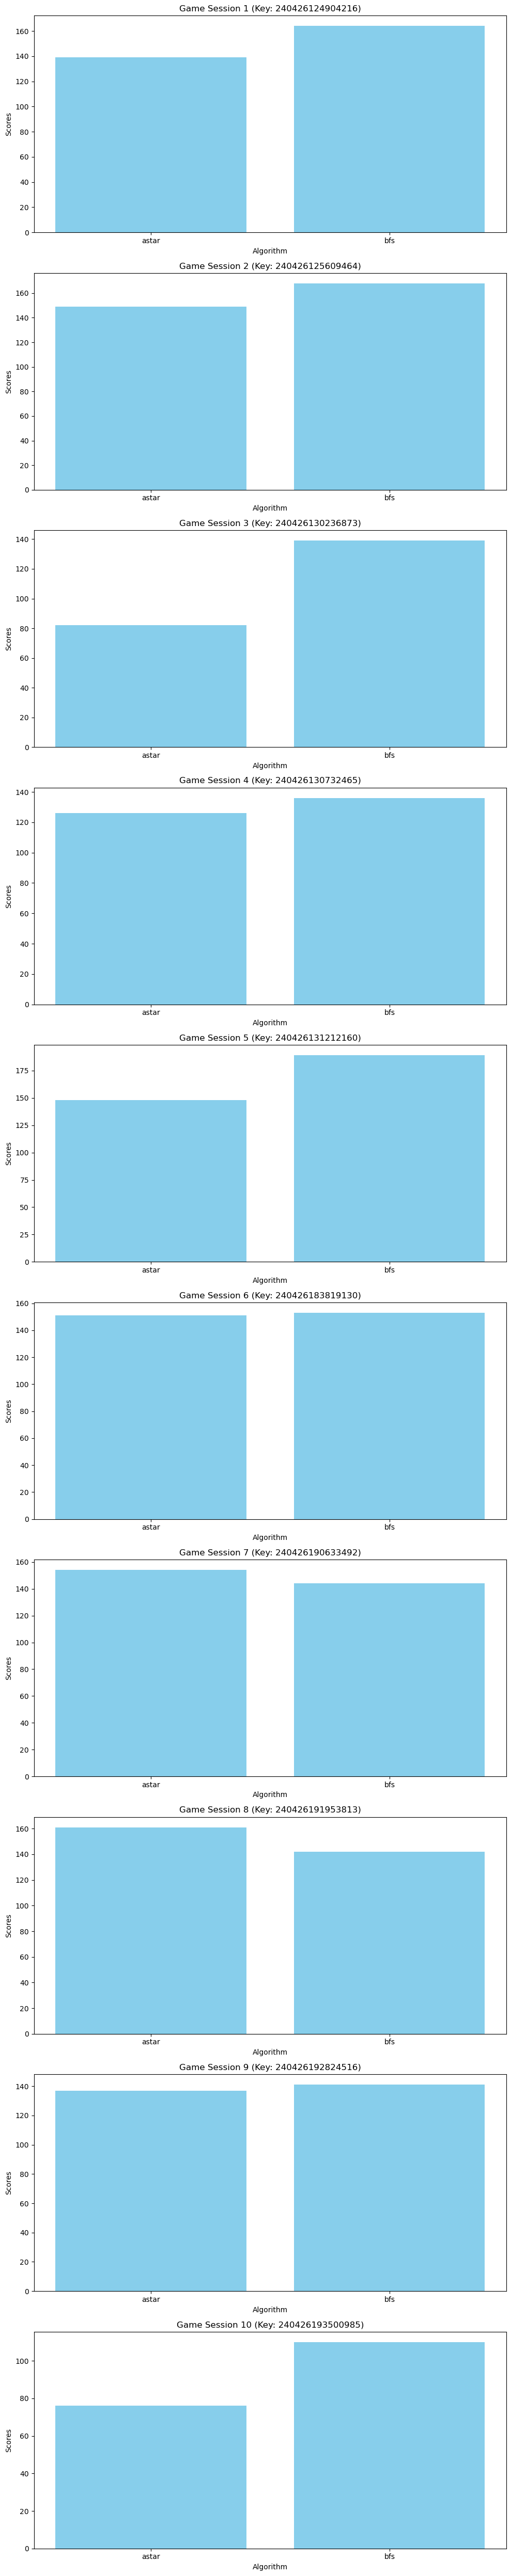

Algorithm: astar, Average Score: 132.3
Algorithm: bfs, Average Score: 148.6


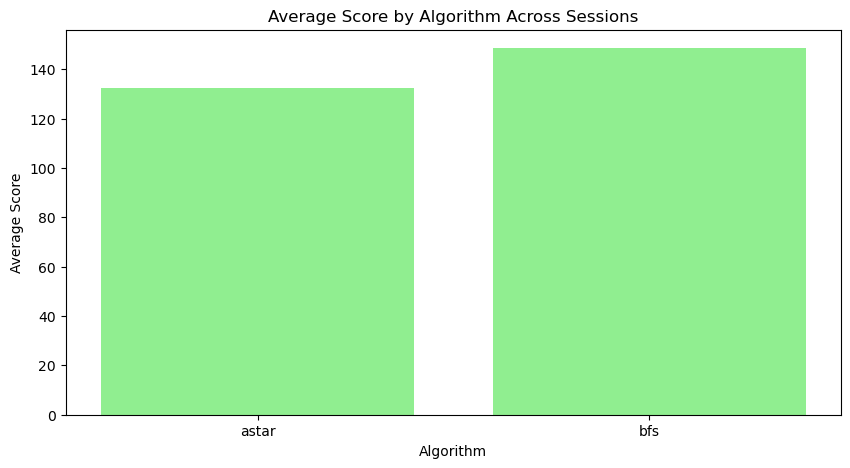

In [289]:

number_of_sessions_to_analyze = 10  

# Dictionary to accumulate scores by algorithm
scores_by_algorithm = {}

# plot session scores
fig, axes = plt.subplots(nrows=number_of_sessions_to_analyze, figsize=(10, 5 * number_of_sessions_to_analyze))

# Iterate over the game sessions
for index, (key, session) in enumerate(game_sessions.items()):
    if index >= number_of_sessions_to_analyze:
        break  # Stop after analyzing the specified number of sessions

    # Calculate the count of apples eaten (score) by each algorithm
    score_by_algorithm = session.groupby('Algorithm')['Algorithm'].count()
    
    # Plot scores
    axes[index].bar(score_by_algorithm.index, score_by_algorithm.values, color='skyblue')
    axes[index].set_title(f"Game Session {index + 1} (Key: {key})")
    axes[index].set_ylabel('Scores')
    axes[index].set_xlabel('Algorithm')
    
    # Accumulate scores by algorithm 
    for algorithm, score in score_by_algorithm.items():
        if algorithm in scores_by_algorithm:
            scores_by_algorithm[algorithm].append(score)
        else:
            scores_by_algorithm[algorithm] = [score]

plt.tight_layout()
plt.show()

# Calculate and plot average scores across all sessions
average_scores = {alg: sum(scores) / len(scores) for alg, scores in scores_by_algorithm.items()}

for alg, avg_score in average_scores.items():
    print(f"Algorithm: {alg}, Average Score: {avg_score}")

plt.figure(figsize=(10, 5))
plt.bar(average_scores.keys(), average_scores.values(), color='lightgreen')
plt.xlabel('Algorithm')
plt.ylabel('Average Score')
plt.title('Average Score by Algorithm Across Sessions')
plt.show()


The BFS algorithm has a slightly higher average score of 148.6 compared to the A* algorithm, which has an average score of 132.3.
This indicates that, on average, the BFS algorithm performed better than the A* algorithm in the evaluated sessions.

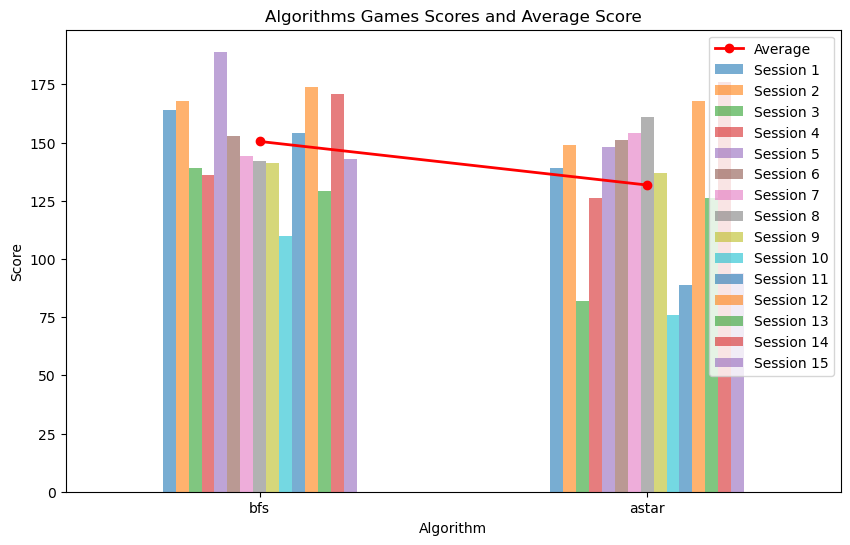

In [290]:

# Number of sessions to analyze
number_of_sessions_to_analyze = 15  
algorithm_counts = []  # To store count data from each session

# Process each session
for index, (key, session) in enumerate(game_sessions.items()):
    if index >= number_of_sessions_to_analyze:
        break
    
    # count of each algorithm in the session
    count_of_algorithms = session['Algorithm'].value_counts()
    count_of_algorithms.name = f"Session {index + 1}"
    algorithm_counts.append(count_of_algorithms)

# Combine all session data into a DataFrame
algorithm_data = pd.concat(algorithm_counts, axis=1).fillna(0)

# Calculate the average count per algorithm across sessions
algorithm_data['Average'] = algorithm_data.mean(axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each session's counts
algorithm_data.drop('Average', axis=1).plot(kind='bar', ax=ax, alpha=0.6)

# Plot the average with a line
algorithm_data['Average'].plot(color='red', marker='o', linestyle='-', linewidth=2, ax=ax, use_index=True)

ax.set_title('Algorithms Games Scores and Average Score')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Score')
ax.legend(loc='upper right')

plt.show()


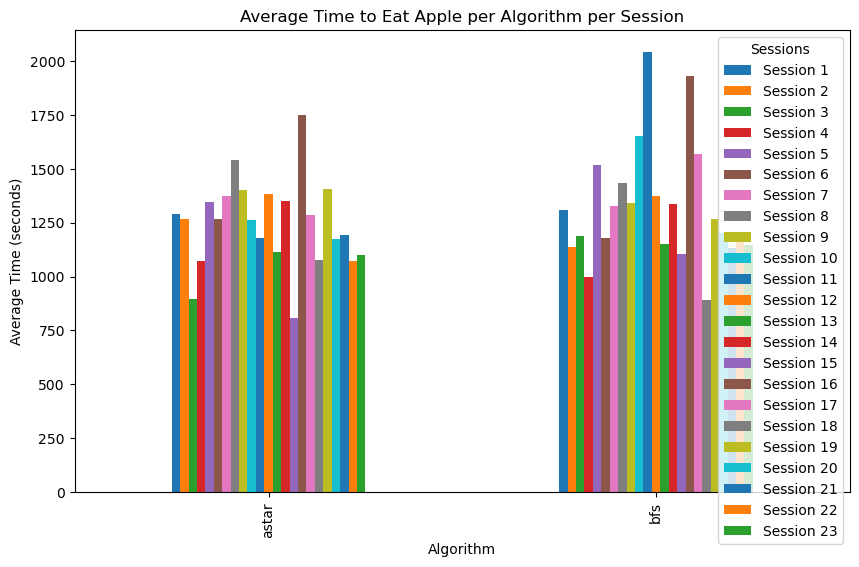

In [291]:

# Number of sessions to analyze
number_of_sessions_to_analyze = 23  
time_data = []  # To store time data from each session

# Process each session
for index, (key, session) in enumerate(game_sessions.items()):
    if index >= number_of_sessions_to_analyze:
        break
    
    # Aggregate time data for each algorithm
    average_time = session.groupby('Algorithm')['Time took eat apple'].mean()
    average_time.name = f"Session {index + 1}"
    time_data.append(average_time)

# Combine all session into a DataFrame
time_data_df = pd.concat(time_data, axis=1).fillna(0)


fig, ax = plt.subplots(figsize=(10, 6))

# Plot
time_data_df.plot(kind='bar', ax=ax)

ax.set_title('Average Time to Eat Apple per Algorithm per Session')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Average Time (seconds)')
ax.legend(title="Sessions", loc='upper right')

plt.show()


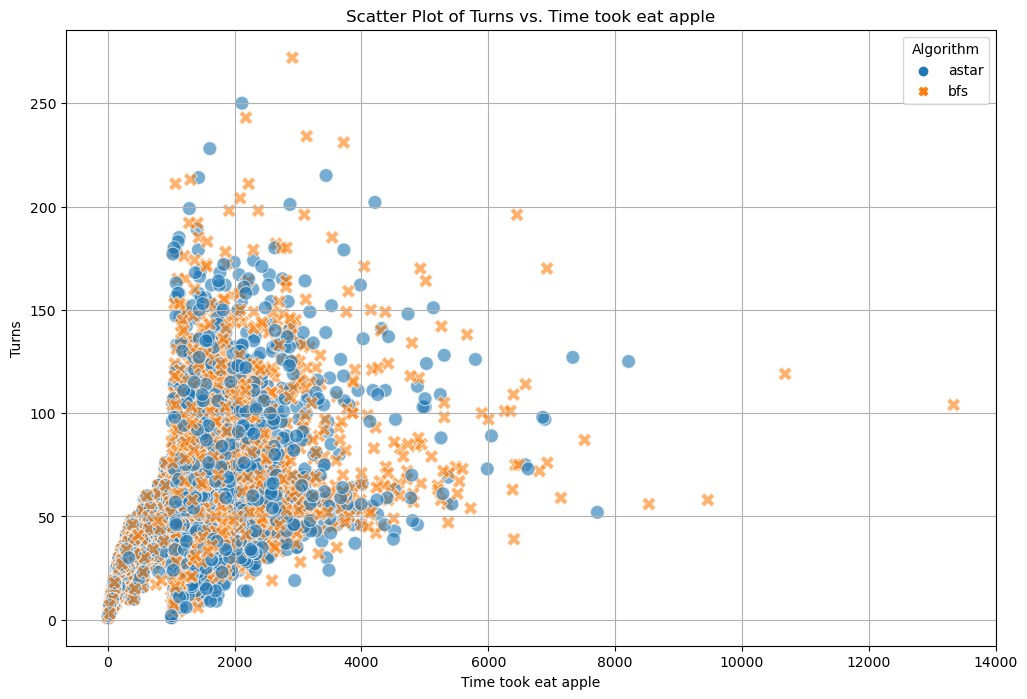

In [292]:

# scatter plot
plt.figure(figsize=(12, 8))  

sns.scatterplot(data=data, x='Time took eat apple', y='Turns', hue='Algorithm', style='Algorithm', s=100, alpha=0.6)
plt.title('Scatter Plot of Turns vs. Time took eat apple')
plt.xlabel('Time took eat apple')
plt.ylabel('Turns')
plt.grid(True)  
plt.legend(title='Algorithm')  

plt.show()



The scatter plot illustrates individual instances of algorithm performance, with each point representing a single run. The X-axis,"Time took eat apple," indicates the duration required for the algorithm to achieve the goal,the Y-axis, "Turns," quantifies the number of moves the algorithm took to reach the apple. 

Two distinct sets of data points are plotted: blue circles for the A* algorithm and orange crosses for the BFS algorithm. The spread of these points provide a visual comparison of the efficiency and behavior of the algorithms.

Density: There is a higher density of data points for both algorithms clustered at the lower end of the time and turns axes, suggesting that both algorithms tend to find the solution more efficiently.

Distribution: The A* algorithm points appear to be more concentrated towards the lower left corner, implying that it generally performs better, taking fewer turns and less time to "eat the apple."

Outliers: There are occasional instances where both algorithms take a significantly longer time or more turns to reach the goal. These outliers may be due to complex games.

Performance Variance: The BFS algorithm shows a wider spread of data points along the X-axis, which may indicate that its performance is more varied with the complexity of the task, whereas the A* algorithm shows a more consistent performance pattern.

Conclusion: The scatter plot suggests that the A* algorithm, on average, outperforms the BFS algorithm in terms of both the time taken and the number of turns to complete the task. A* tends to be more consistent and efficient, which aligns with its heuristic-based search approach that prioritizes paths that appear to lead more directly to the goal. In contrast, BFS explores all possible paths equally without preference, which can result in increased search times and more turns, as reflected in the broader spread of its data points.




            count       mean        std  min   25%   50%    75%    max
Algorithm                                                             
astar      3197.0  49.088208  34.780103  1.0  24.0  41.0  64.00  250.0
bfs        3332.0  49.077431  35.419085  1.0  24.0  41.0  64.25  272.0


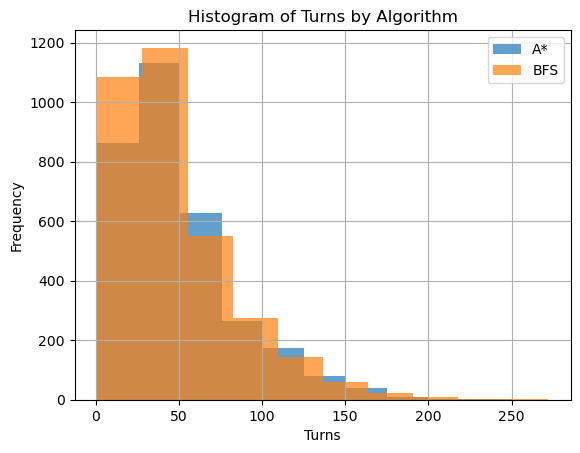

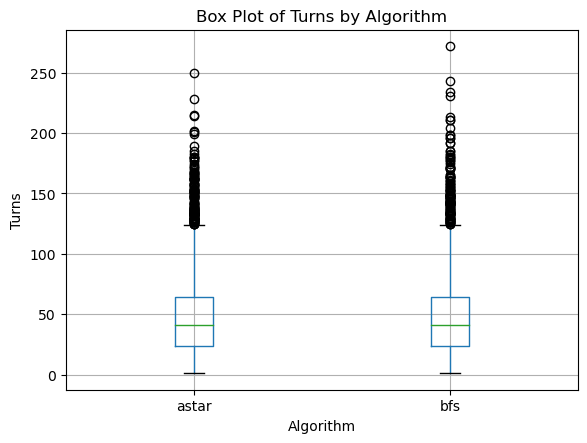

T-test result: t_stat = 0.012403631059893597, p_value = 0.9901039673323517
Mann-Whitney U Test result: u_stat = 5356762.0, p_value = 0.6881199917907379


In [293]:
import scipy.stats as stats

# Descriptive Statistics
print(data.groupby('Algorithm')['Turns'].describe())

# Histograms
data[data['Algorithm'] == 'astar']['Turns'].hist(alpha=0.7, label='A*')
data[data['Algorithm'] == 'bfs']['Turns'].hist(alpha=0.7, label='BFS')
plt.legend()
plt.title('Histogram of Turns by Algorithm')
plt.xlabel('Turns')
plt.ylabel('Frequency')
plt.show()

# Box Plot
data.boxplot(by='Algorithm', column='Turns')
plt.title('Box Plot of Turns by Algorithm')
plt.suptitle('')
plt.xlabel('Algorithm')
plt.ylabel('Turns')
plt.show()

# Statistical Test
astar_turns = data[data['Algorithm'] == 'astar']['Turns']
bfs_turns = data[data['Algorithm'] == 'bfs']['Turns']

# T-test
t_stat, p_val = stats.ttest_ind(astar_turns, bfs_turns, equal_var=False)
print("T-test result: t_stat = {}, p_value = {}".format(t_stat, p_val))

# Mann-Whitney U Test if the distributions are not normal
u_stat, p_val_u = stats.mannwhitneyu(astar_turns, bfs_turns)
print("Mann-Whitney U Test result: u_stat = {}, p_value = {}".format(u_stat, p_val_u))


Histogram of Turns by Algorithm

A Algorithm*: The A* algorithm was executed 3197 times. The mean number of turns is approximately 49.88 with a standard deviation of approximately 34.78, indicating the spread of turns around the mean. The minimum number of turns taken is 1, the first quartile (25%) is at 24 turns, the median (50%) is at 41 turns, and the third quartile (75%) is at 64 turns, with the maximum at 250 turns. The distribution appears to be right-skewed, suggesting that there are cases where the A* algorithm takes significantly more turns than average.

BFS Algorithm: BFS was executed 3332 times with a mean of approximately 49.07 turns, which is slightly less than A*. The standard deviation is around 35.41, which is similar to A*'s, indicating a similar spread of data. The minimum number of turns is also 1, the first quartile is at 24 turns, the median is at 41 turns, which is exactly the same as A*'s median, and the third quartile is at 64.25 turns with the maximum at 272 turns. This suggests BFS also has a right-skewed distribution with a long tail of higher values.

For both A and BFS:*

The median (central line in the box) is situated towards the lower end of the interquartile range (IQR), which indicates that more than half of the runs completed with a turn count below the average. For both algorithms, the median is at 41 turns.

The first quartile (bottom edge of the box) is at 24 turns for both algorithms, indicating that 25% of the runs were completed with 24 turns or fewer.

The third quartile (top edge of the box) is at 64 turns for A* and slightly higher at 64.25 for BFS, showing that 75% of the runs were completed with 64 or 64.25 turns or fewer, respectively.

The A* algorithm's range ends at 250 turns, while the BFS's range ends at 272 turns, indicating that BFS had cases where it took more turns.

In summary, the box plot shows that the central tendency and variability in the number of turns for both A* and BFS are very similar, with a slight indication that BFS could occasionally take more turns than A*

T-test
T-test Result: The t_statistic is 0.0124 with a p_value of 0.9901.
Interpretation: The T-test is used to compare the means of two independent groups to see if they are statistically different from each other. A t_statistic near zero and a large p_value (greater than 0.05) indicate that there is no evidence of a significant difference between the means. In this case, the p_value of 0.9901 is much higher than the common alpha level of 0.05, which suggests that the mean number of turns taken by the A* and BFS algorithms are not statistically different from one another. This means that any observed difference in the sample means is likely due to random chance rather than a systematic difference between the two algorithms.

Mann–Whitney U Test
U Test Result: The U_stat is 5356762 with a p_value of 0.6881.
Interpretation: The Mann–Whitney U test is a nonparametric test that compares two independent groups to determine whether their samples come from the same distribution. It does not assume the data is normally distributed. In this test, a high p_value (also greater than 0.05) suggests that there is no evidence of a significant difference in the distributions of the two groups. With a p_value of 0.6881, the test indicates that the distributions of the number of turns for A* and BFS are likely similar. Therefore, we do not have sufficient evidence to claim that one algorithm consistently results in a higher or lower number of turns than the other.

The results of both the T-test and the Mann–Whitney U test provide strong evidence that there is no significant difference between the A* and BFS algorithms in terms of the number of turns taken. The T-test indicates no significant difference in the mean turns, while the Mann–Whitney U test suggests there is no significant difference in the overall distributions of turns.

To conclude, the analysis reveals some interesting points about how the A* and BFS algorithms perform:

The results demonstrate the superiority of the BFS algorithm in terms of higher scores. These findings suggest that the BFS algorithm is a strong candidate for games that prioritize score optimization and quick decision-making.

Average Performance: Despite the BFS algorithm having a slightly higher average score, suggesting it might perform better, the T-test and Mann–Whitney U test indicate that there's no significant difference in the number of turns each algorithm typically takes.

Efficiency and Behavior: The scatter plot displays individual runs of the algorithms, with A* runs tending to be quicker and use fewer turns, as shown by the concentration of data points towards the bottom left. This could mean that in individual cases, A* is more efficient.

Consistency: The A* algorithm generally shows a more consistent performance, especially in cases that are not overly complex. This consistency can be an advantage in predictable environments.

Statistical Significance: The statistical tests, however, suggest that these differences are not statistically significant. This means that, I wouldn't expect one algorithm to outperform the other in terms of the number of turns needed.
